# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_._1) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(2, 9)
defeat = pd.read_csv(datapath + 'role_defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'role_victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A  D   DMG     H   MIT    GAME
0   0   0  0  8  2947  1425  4611  DEFEAT
    1   1  0  3  1818     0   650  DEFEAT
    2   2  0  7  4735   487   308  DEFEAT
    3   1  0  3  2078  2748     0  DEFEAT
    4   1  1  3   269  5848   189  DEFEAT
...    .. .. ..   ...   ...   ...     ...
799 5   9  2  9  6061  2782  5820  DEFEAT
    6   9  1  7  9798  1027  1141  DEFEAT
    7  10  0  9  9141     0    20  DEFEAT
    8   7  3  8  4594  5856     0  DEFEAT
    9   2  8  4  3045  8775   889  DEFEAT

[8000 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8000 entries, (0, 0) to (799, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       8000 non-null   int64 
 1   A       8000 non-null   int64 
 2   D       8000 non-null   int64 
 3   DMG     8000 non-null   int64 
 4   H       8000 non-null   int64 
 5   MIT     8000 non-null   int64 
 6   GAME    8000 non-null   object
dtypes: int64(6), object(1)
memory usage: 499.9+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,14.779000,7.359375,6.684500,6958.433000,3743.760000,2273.138125
std,9.172673,7.972322,3.825544,4414.278707,4873.319776,4381.086840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,4.000000,3495.750000,0.000000,0.000000
50%,14.000000,4.000000,6.000000,6327.000000,716.500000,394.000000
75%,21.000000,12.000000,9.000000,9738.000000,7116.750000,1928.500000
max,57.000000,62.000000,23.000000,29922.000000,26419.000000,34301.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E  A  D   DMG     H   MIT    GAME
0   0   0  0  8  2947  1425  4611  DEFEAT
    1   1  0  3  1818     0   650  DEFEAT
    2   2  0  7  4735   487   308  DEFEAT
    3   1  0  3  2078  2748     0  DEFEAT
    4   1  1  3   269  5848   189  DEFEAT
...    .. .. ..   ...   ...   ...     ...
799 5   9  2  9  6061  2782  5820  DEFEAT
    6   9  1  7  9798  1027  1141  DEFEAT
    7  10  0  9  9141     0    20  DEFEAT
    8   7  3  8  4594  5856     0  DEFEAT
    9   2  8  4  3045  8775   889  DEFEAT

[8000 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1600.000000,1600.00000,1600.000000,1600.000000,1600.00000,1600.000000
mean,18.461250,4.40875,6.455625,9945.733125,554.44375,9129.546250
std,9.500061,3.56172,3.812265,4201.108757,1298.91570,5793.719373
min,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,12.000000,2.00000,4.000000,6982.000000,0.00000,4906.500000
50%,18.000000,4.00000,6.000000,9645.500000,0.00000,7835.500000
75%,24.000000,6.00000,8.000000,12623.000000,457.50000,12252.000000
max,57.000000,28.00000,23.000000,27480.000000,15168.00000,34301.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,17.755938,2.019062,7.396250,8835.213438,288.480313,585.376562
std,8.932878,2.572478,4.022815,3876.261614,516.809663,1048.636918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,5.000000,6086.750000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8500.500000,0.000000,97.000000
75%,24.000000,3.000000,10.000000,11126.250000,395.000000,766.000000
max,56.000000,16.000000,23.000000,29922.000000,3353.000000,12145.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,3200.000000,3200.00000,3200.000000,3200.000000,3200.000000,3200.000000
mean,9.960938,14.17500,6.087187,3588.002500,8793.697813,532.695625
std,6.827077,8.16189,3.500934,2350.817025,3966.590231,850.758109
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,8.00000,4.000000,1942.750000,5960.750000,0.000000
50%,9.000000,14.00000,6.000000,3244.500000,8314.000000,247.000000
75%,14.000000,19.00000,8.000000,4829.000000,11248.500000,708.250000
max,45.000000,62.00000,23.000000,15946.000000,26419.000000,8656.000000


그림 저장:tank_hist


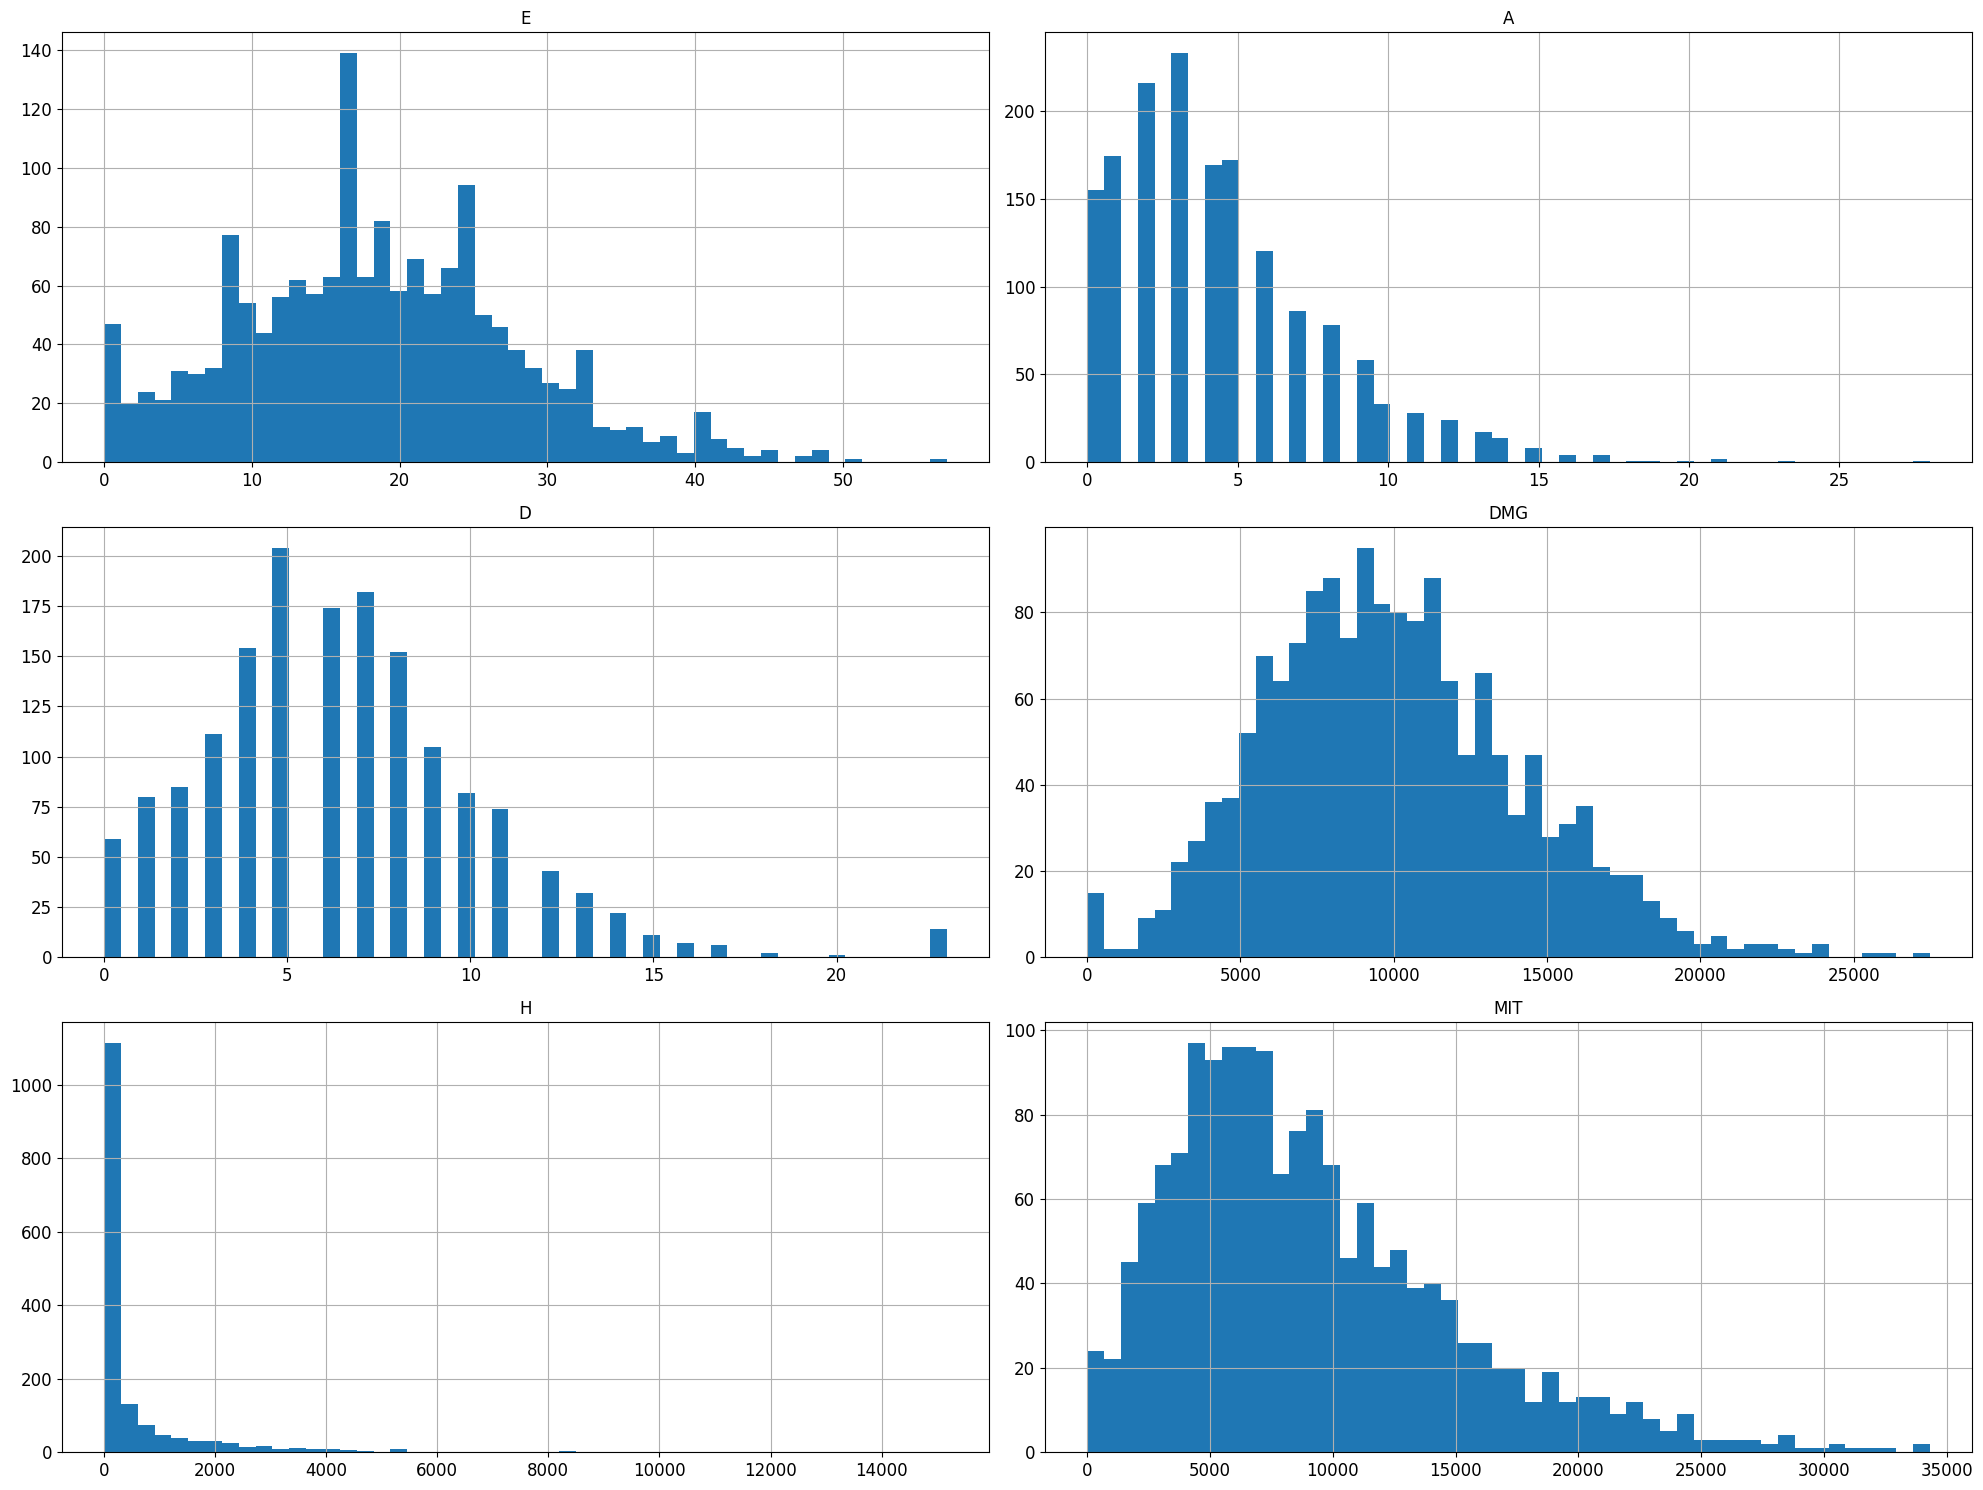

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


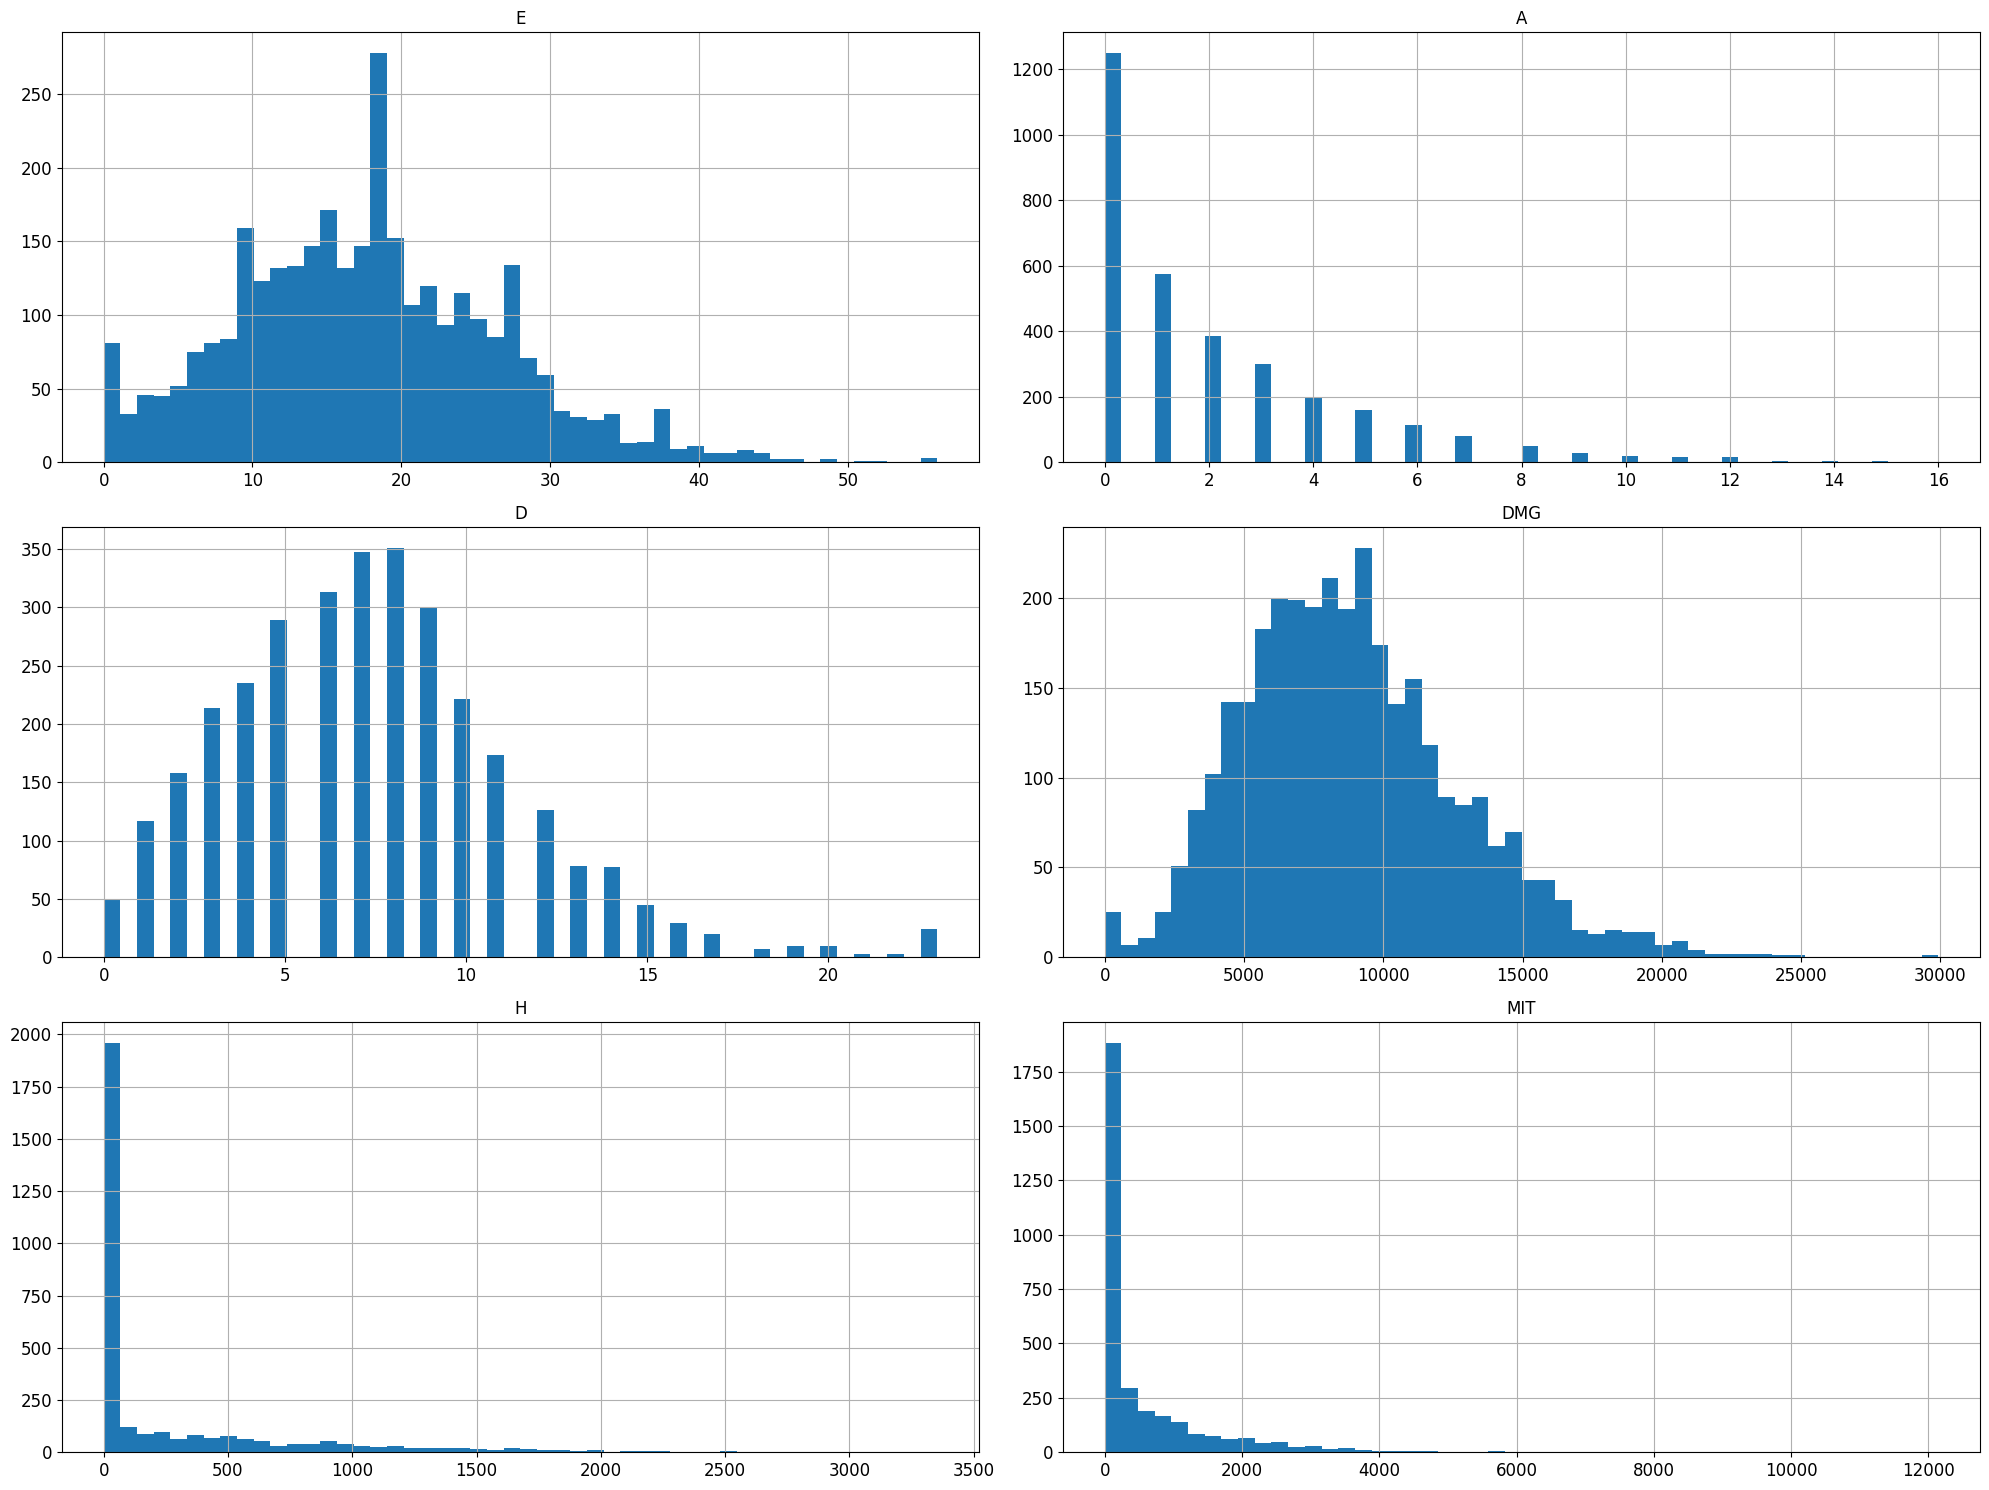

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


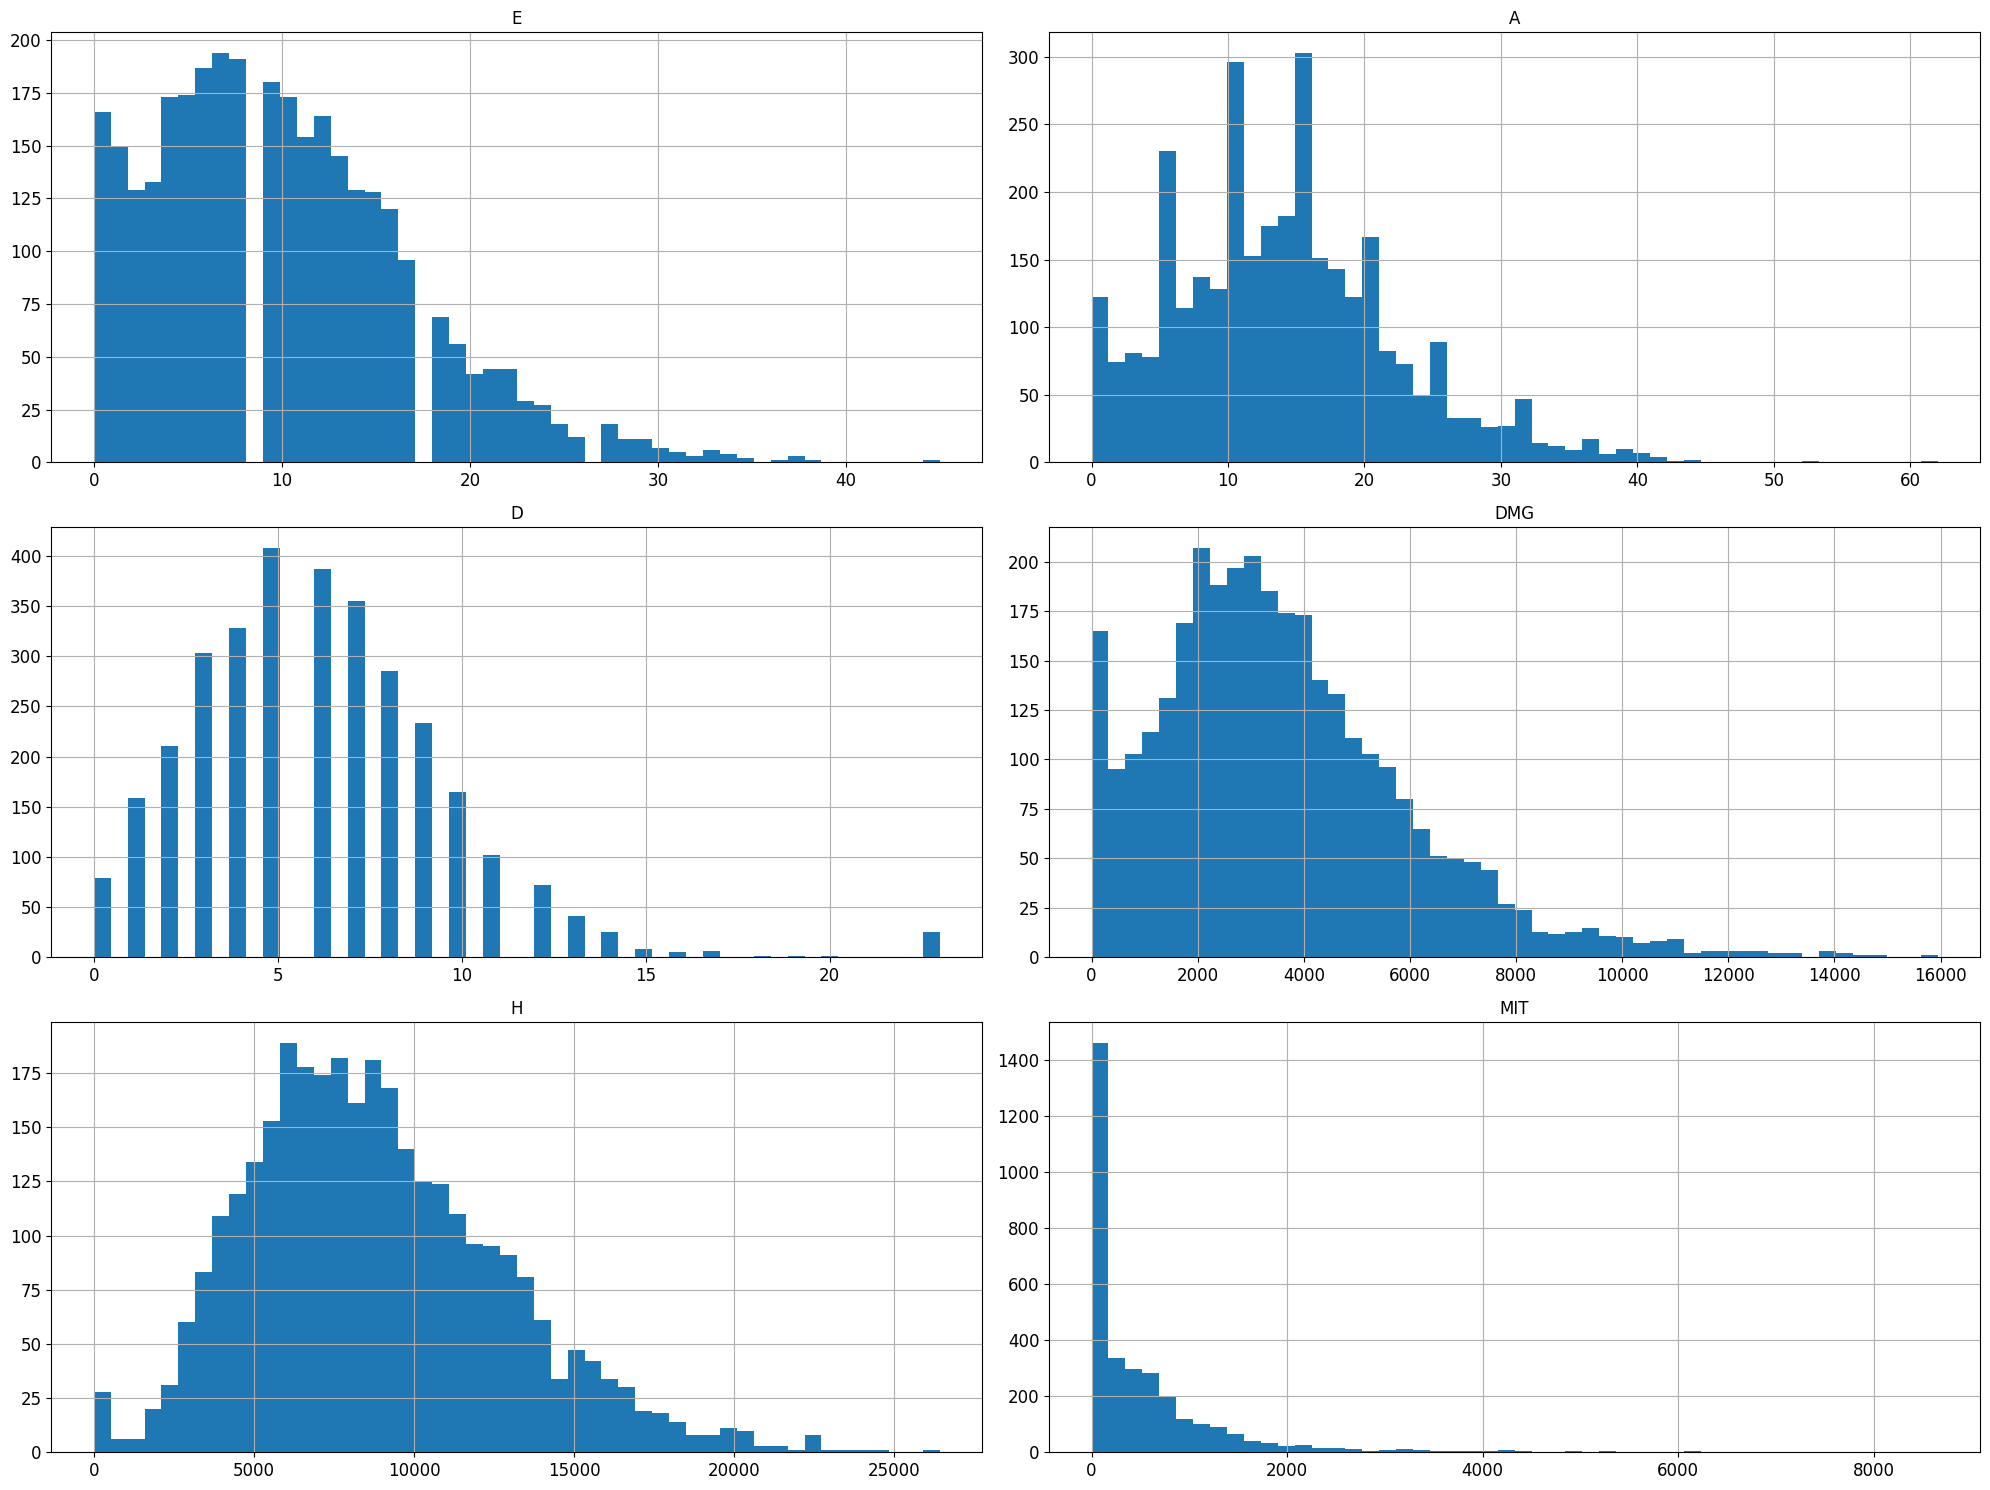

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards._1) // players))]
scoreboards

E   A  D    DMG      H    MIT     GAME
347 0  25   5  7  11611      0   7151   DEFEAT
    1  19   5  9  13114      0    289   DEFEAT
    2  21   7  7   8695   1868      0   DEFEAT
    3   4  14  9   3545   8492   1211   DEFEAT
    4  16   7  4   5443   7352      0   DEFEAT
...    ..  .. ..    ...    ...    ...      ...
349 5  30   9  7  11065      0  21270  VICTORY
    6  22   2  3  16682      0     42  VICTORY
    7  26   5  5  10773    802   5617  VICTORY
    8  18  19  5   5102   7642    209  VICTORY
    9  13  13  4   3504  10578      0  VICTORY

[8000 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X._1, X.columns)
X

E         A         D       DMG         H       MIT
347 0  0.438596  0.080645  0.304348  0.388042  0.000000  0.208478
    1  0.333333  0.080645  0.391304  0.438273  0.000000  0.008425
    2  0.368421  0.112903  0.304348  0.290589  0.070707  0.000000
    3  0.070175  0.225806  0.391304  0.118475  0.321435  0.035305
    4  0.280702  0.112903  0.173913  0.181906  0.278285  0.000000
...         ...       ...       ...       ...       ...       ...
349 5  0.526316  0.145161  0.304348  0.369795  0.000000  0.620099
    6  0.385965  0.032258  0.130435  0.557516  0.000000  0.001224
    7  0.456140  0.080645  0.217391  0.360036  0.030357  0.163756
    8  0.315789  0.306452  0.217391  0.170510  0.289262  0.006093
    9  0.228070  0.209677  0.173913  0.117104  0.400394  0.000000

[8000 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(800, 60)
(800,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.875  , 0.93125, 0.925  , 0.9    , 0.93125])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.63125, 0.6125 , 0.61875, 0.63125, 0.64375])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.8625 , 0.9    , 0.91875, 0.9125 , 0.8875 ])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(SVC(), 0.9212499999999999),
 (NearestCentroid(), 0.91875),
 (NuSVC(), 0.91875),
 (LogisticRegression(n_jobs=-1), 0.91625),
 (LinearSVC(), 0.91625),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9125),
 (ExtraTreesClassifier(n_jobs=-1), 0.9112500000000001),
 (RidgeClassifierCV(), 0.90625),
 (RandomForestClassifier(n_jobs=-1), 0.905),
 (RidgeClassifier(), 0.905),
 (MLPClassifier(max_iter=3200), 0.9037499999999999),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.9),
 (HistGradientBoostingClassifier(), 0.8987499999999999),
 (KNeighborsClassifier(n_jobs=-1), 0.8975),
 (GradientBoostingClassifier(), 0.89625),
 (AdaBoostClassifier(), 0.8825),
 (SGDClassifier(n_jobs=-1), 0.8800000000000001),
 (Perceptron(n_jobs=-1), 0.8787499999999999),
 (BaggingClassifier(n_jobs=-1), 0.8775000000000001),
 (DecisionTreeClassifier(), 0.8300000000000001),
 (ExtraTreeClassifier(), 0.7874999999999999),
 (RadiusNeighborsClassifier(n_jobs=-1, radius=2.0), 0.6275000000000001)]

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0)
        importances_supports = importances[supports].sum(0)
        importances[tanks] = importances_tanks / 2
        importances[damages] = importances_damages / 4
        importances[supports] = importances_supports / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title} (10인): {importance * 100:.2f}%')

        print('\n**역할 중요도**')
        for importance, title in sorted(
                zip((importances[tanks].sum(), importances[damages].sum(), importances[supports].sum()), ('돌격 (2인)', '공격 (4인)', '지원 (4인)')),
                reverse=True
        ):
            print(f'{title}: {importance * 100:.2f}%')

        print('\n**돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title} (2인): {importance * 100:.2f}%')

        print('\n**공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title} (4인): {importance * 100:.2f}%')

        print('\n**지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title} (4인): {importance * 100:.2f}%')

        break

**특성 중요도**
처치 (10인): 32.94%
죽음 (10인): 27.53%
도움 (10인): 18.48%
피해 (10인): 8.43%
치유 (10인): 6.31%
경감 (10인): 6.30%

**역할 중요도**
지원 (4인): 40.56%
공격 (4인): 35.18%
돌격 (2인): 24.26%

**돌격 특성 중요도**
처치 (2인): 8.31%
죽음 (2인): 7.56%
도움 (2인): 4.01%
피해 (2인): 1.94%
경감 (2인): 1.33%
치유 (2인): 1.11%

**공격 특성 중요도**
처치 (4인): 16.08%
죽음 (4인): 7.68%
피해 (4인): 3.64%
도움 (4인): 3.33%
경감 (4인): 2.26%
치유 (4인): 2.18%

**지원 특성 중요도**
죽음 (4인): 12.29%
도움 (4인): 11.14%
처치 (4인): 8.55%
치유 (4인): 3.02%
피해 (4인): 2.85%
경감 (4인): 2.71%


In [62]:
averages = importances.sum(0) / players

In [63]:
defeats = defeat._1.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions = (contributions * averages).sum(1)
    contributions *= players / contributions.sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (400)
       E   A  D    DMG      H    MIT     GAME
3990  11   1  4  11189      0  26690   DEFEAT
3991  17   2  7  12621      0      0   DEFEAT
3992  15   0  6   7688     20   1741   DEFEAT
3993   7  10  6   2937   9983   1478   DEFEAT
3994   2   8  8   1299   9612    279   DEFEAT
3995  17   2  5  11569      0  14047  VICTORY
3996  19   0  4  11299      0      0  VICTORY
3997  17   2  6  10642      0      0  VICTORY
3998   7  16  5   1836  13913    605  VICTORY
3999  14  21  3   5590   8795      0  VICTORY
TEAM 1: 1.10 0.97 0.92 0.90 0.71
TEAM 2: 1.11 1.08 0.99 1.00 1.23

DEFEAT (399)
       E   A   D    DMG      H    MIT     GAME
3980  14   4  10  16964   5592   4480   DEFEAT
3981  14   0  13   7985     20   1121   DEFEAT
3982  14   0  12   7563      0      0   DEFEAT
3983  12  13  11   6107   8112      0   DEFEAT
3984  10  10   8   4408  10874   1453   DEFEAT
3985  33   7   6  16604    600  13913  VICTORY
3986  25   1   5  12934      0      0  VICTORY
3987  32   0   6  11940  

In [64]:
victorys = victory._1.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions = (contributions * averages).sum(1)
    contributions *= players / contributions.sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (400)
       E   A  D    DMG     H   MIT     GAME
3990  28  11  4  10275   361  9589  VICTORY
3991  20   0  4   5979     0     0  VICTORY
3992  20   1  6  13185   614     0  VICTORY
3993  13  18  2   4990  8589   555  VICTORY
3994  18  14  4   3859  7320     0  VICTORY
3995   9   2  9   6061  2782  5820   DEFEAT
3996   9   1  7   9798  1027  1141   DEFEAT
3997  10   0  9   9141     0    20   DEFEAT
3998   7   3  8   4594  5856     0   DEFEAT
3999   2   8  4   3045  8775   889   DEFEAT
TEAM 1: 1.40 1.08 1.08 1.24 1.20
TEAM 2: 0.78 0.83 0.75 0.76 0.88

VICTORY (399)
       E   A  D    DMG     H    MIT     GAME
3980  21   6  5  11246  1103   1791  VICTORY
3981  20   0  5   7237     0      0  VICTORY
3982  14   5  5   5615   309   2586  VICTORY
3983   6  16  3   2294  8101    741  VICTORY
3984  14  16  5   6465  5427      0  VICTORY
3985   9   1  7   7688   727  11878   DEFEAT
3986  11   1  7   6994    40   1639   DEFEAT
3987  10   1  9   6889     0      0   DEFEAT
3988   6   8  8 

In [65]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(keras.Input((total_features,)))
model.add(layers.Dense(300, 'relu'))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2025-04-30 05:13:54.398052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745990034.533518      32 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745990034.573260      32 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745990034.869077      32 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745990034.869137      32 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745990034.869138      32 computation_placer.cc:177] computation placer alr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,501 (189.46 KB)

 Trainable params: 48,501 (189.46 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5054 - loss: 0.6886 - val_accuracy: 0.7650 - val_loss: 0.6735
Epoch 2/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6829 - loss: 0.6804 - val_accuracy: 0.8850 - val_loss: 0.6654
Epoch 3/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8490 - loss: 0.6672 - val_accuracy: 0.8800 - val_loss: 0.6579
Epoch 4/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - loss: 0.6569 - val_accuracy: 0.8700 - val_loss: 0.6502
Epoch 5/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8586 - loss: 0.6514 - val_accuracy: 0.8700 - val_loss: 0.6426
Epoch 6/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.6376 - val_accuracy: 0.8650 - val_loss: 0.6342
Epoch 7/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.6317 - val_accuracy: 0.8650 - val_loss: 0.6258
Epoch 8/256
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8851 - loss: 0.6208 - val_accuracy: 0.8700 - v

(0.21625041961669922, 0.9300000071525574)